In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

In [6]:
#fonte https://www.ncei.noaa.gov/access/paleo-search/study/1003403

europa_centrale = pd.read_csv('Buentgen_et_al_Science_2011.txt'  , skiprows=114 , delimiter='\t'  , header= None , names = ['Years' , 'Temperature' , '0'])
europa_centrale.drop(columns='0' , inplace=True)
europa_centrale.head()

,Years,Temperature
0,-500,0.404822
1,-499,0.394896
2,-498,1.208766
3,-497,1.243505
4,-496,-0.101366


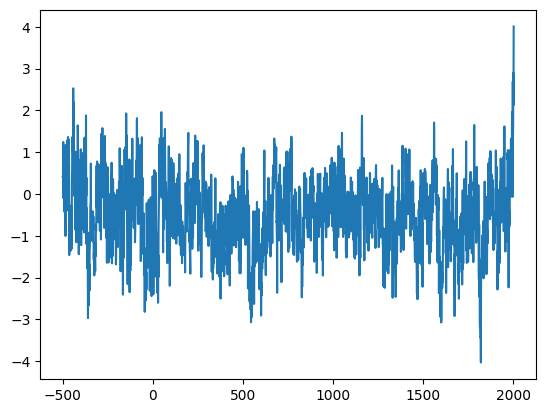

In [7]:
plt.plot(europa_centrale['Years'] ,  europa_centrale['Temperature'])

In [13]:
def filtro_30(inizio) :
    filtro1 =  europa_centrale[ europa_centrale['Years'] < inizio ].index
    filtro2 =  europa_centrale[ europa_centrale['Years'] > inizio + 30].index
    data =  europa_centrale.drop(filtro1)
    data = data.drop(filtro2)

    return data

In [16]:
medie = np.array([])
europa_centrale['Years'] =  europa_centrale.Years.astype(int)
for i in range( europa_centrale['Years'].min() ,  europa_centrale['Years'].max() , 1) : 
    medie =  np.append( medie , filtro_30(i)['Temperature'].mean())

europa_centrale['MediaMobile'] = medie.tolist()

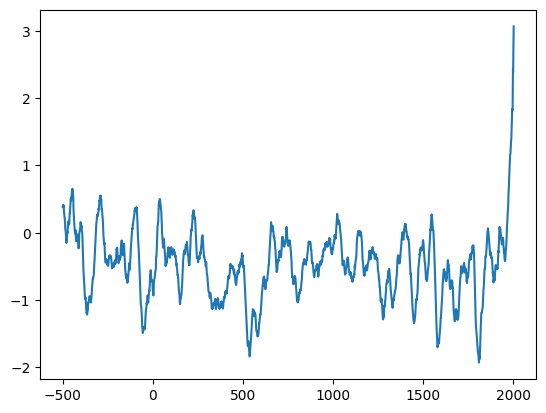

In [17]:
#plt.plot( europa_centrale.Years ,  europa_centrale.Temperature)
plt.plot( europa_centrale.Years ,  europa_centrale.MediaMobile)

In [18]:
def filtro_medio(inizio) :
    filtro1 =  europa_centrale[ europa_centrale['Years'] < inizio -5].index
    filtro2 =  europa_centrale[ europa_centrale['Years'] > inizio + +5].index
    data =  europa_centrale.drop(filtro1)
    data = data.drop(filtro2)

    return data

In [19]:
medie = np.array([])
date = np.array([])
europa_centrale['Years'] =  europa_centrale.Years.astype(int)
for i in range( europa_centrale['Years'].min() + 4 ,  europa_centrale['Years'].max() - 4 , 1) : 
    medie =  np.append(medie , filtro_medio(i)['Temperature'].mean())
    date = np.append(date , filtro_medio(i)['Years'].mean())


dati_linearizzati = {'Years' : date , "Temperature" : medie }

dati_linearizzati = pd.DataFrame(dati_linearizzati)

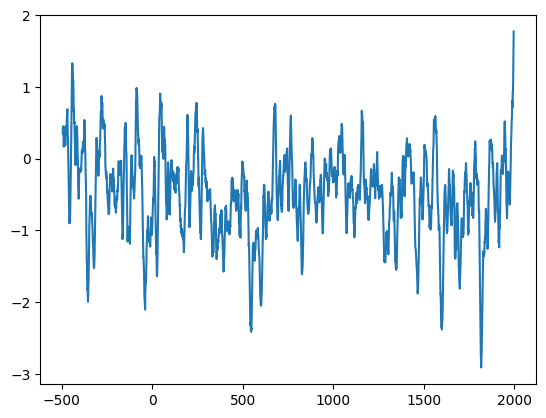

In [20]:
#plt.plot( europa_centrale.Years ,  europa_centrale.Temperature)
plt.plot(dati_linearizzati.Years , dati_linearizzati.Temperature)